In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

   1880    13.5725
0  1881  13.599167
1  1882  13.685000
2  1883  13.671667
3  1884  13.395000
4  1885  13.535000


/tmp/ipykernel_130257/2153473643.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('global-temperatures.csv', delim_whitespace=True)


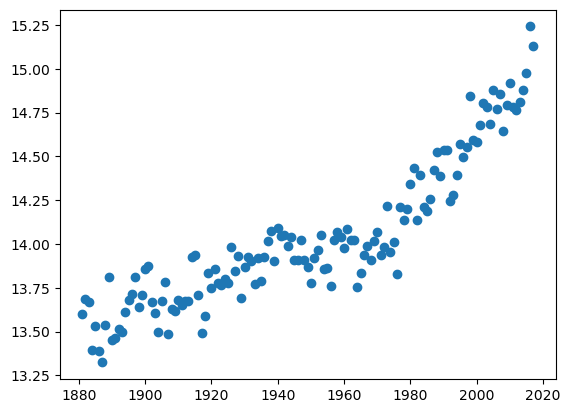

In [19]:
df = pd.read_csv('global-temperatures.csv', delim_whitespace=True)
print(df.head())
x = df.iloc[:, 0]
y = df.iloc[:, 1]
plt.scatter(x, y)
plt.show()



In [ ]:
# Perform the linear regression
n_of_observations = len(x)
slope = (n_of_observations*(np.sum(x*y)) - np.sum(x)*np.sum(y)) / n_of_observations

